## 02686 Exam Report

## 1.1 Prey predator

In [1]:
# Prey predator function valuation
def PreyPredator(t, x, a, b):
    x1, x2 = x
    dx1= a * (1 - x2) * x1
    dx2 = -b * (1 - x1) * x2
    return [dx1,dx2]

# Jacobian of prey predator valuation
def PreyPredator_Jac(t, x, a, b):
    x1, x2 = x
    dx1x1 = a * (1 - x2) 
    dx1x2 = -a * x1
    dx2x1 = b * x2
    dx2x2 = -b * (1 - x1)
    x2_ = -b * (1 - x[0]) * x[1]
    return [[dx1x1, dx1x2], [dx2x1, dx2x2]]

# Prey predator function and jacobian
def PreyPredator_Fun_Jac(t, x, a, b):
    x1, x2 = x

    dx1= a * (1 - x2) * x1
    dx2 = -b * (1 - x1) * x2

    dx1x1 = a * (1 - x2) 
    dx1x2 = -a * x1
    dx2x1 = b * x2
    dx2x2 = -b * (1 - x1)
    return [dx1,dx2], [[dx1x1, dx1x2], [dx2x1, dx2x2]]

## 1.2 Van der Pol

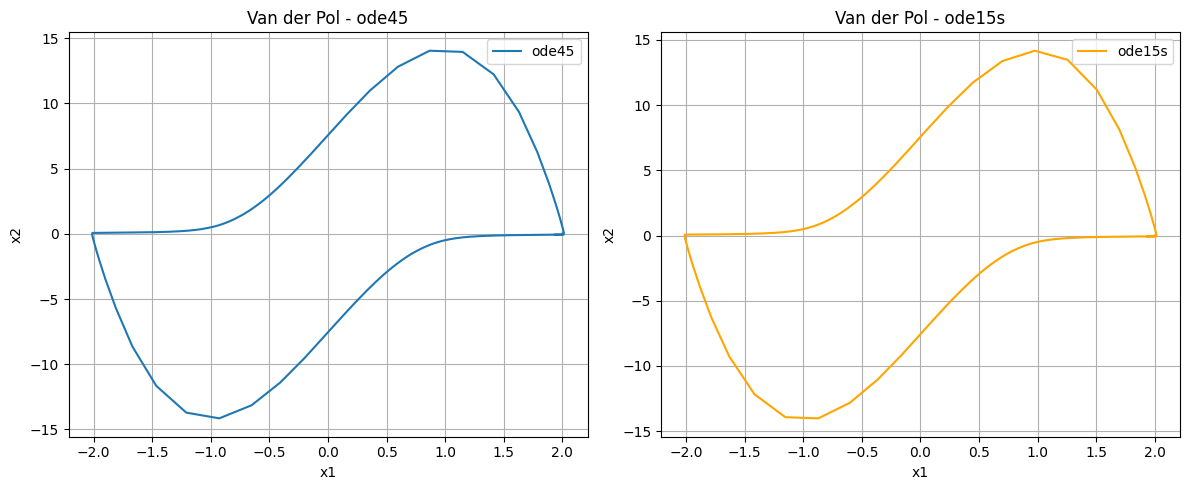

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def VanDerPol(t,x,mu):

    x1_ = x[1]

    x2_ = mu*(1-x[0]**2)*x[1]-x[0]

    return [x1_,x2_]

def VanDerPol_Jac(t, x, mu):
    x1, x2 = x
    return [
        [0, 1],
        [-2 * mu * x1 * x2 - 1, mu * (1 - x1**2)]
    ]

mu = 10
x0 = [2.0, 0.0]
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)  

sol_ode45 = solve_ivp(VanDerPol, t_span, x0, args=(mu,), t_eval=t_eval, method='RK45')

sol_ode15s = solve_ivp(VanDerPol, t_span, x0, args=(mu,), t_eval=t_eval, method='BDF',jac = VanDerPol_Jac)


"""
plt.plot(solution.t, solution.y[0], label='x1 (Position)')
plt.plot(solution.t, solution.y[1], label='x2 (Velocity)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Van der Pol Oscillator')
plt.grid()
plt.show()

plt.figure()
plt.plot(solution.y[0], solution.y[1], label='Ode45')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Van der Pol Oscillator - Time Evolution')
plt.grid()
plt.show()
"""
fig, axs = plt.subplots(1, 2, figsize=(12, 5))


# Plot RK45 (ode45)
axs[0].plot(sol_ode45.y[0], sol_ode45.y[1], label='ode45')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Van der Pol - ode45')
axs[0].legend()
axs[0].grid()

# Plot BDF (ode15s)
axs[1].plot(sol_ode15s.y[0], sol_ode15s.y[1], label='ode15s', color='orange')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].set_title('Van der Pol - ode15s')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


## 1.3 Chemical Reaction in a Continuous Stirred Tank Reactor (CSTR)

In [2]:
import numpy as np

CSTR 3 state

[[-4.31490401e+04 -2.71787251e+04 -7.70063879e+02]
 [-8.15361754e+04 -5.67384026e+04 -1.54012776e+03]
 [ 5.45392478e+06  3.63594985e+06  1.05399531e+05]]


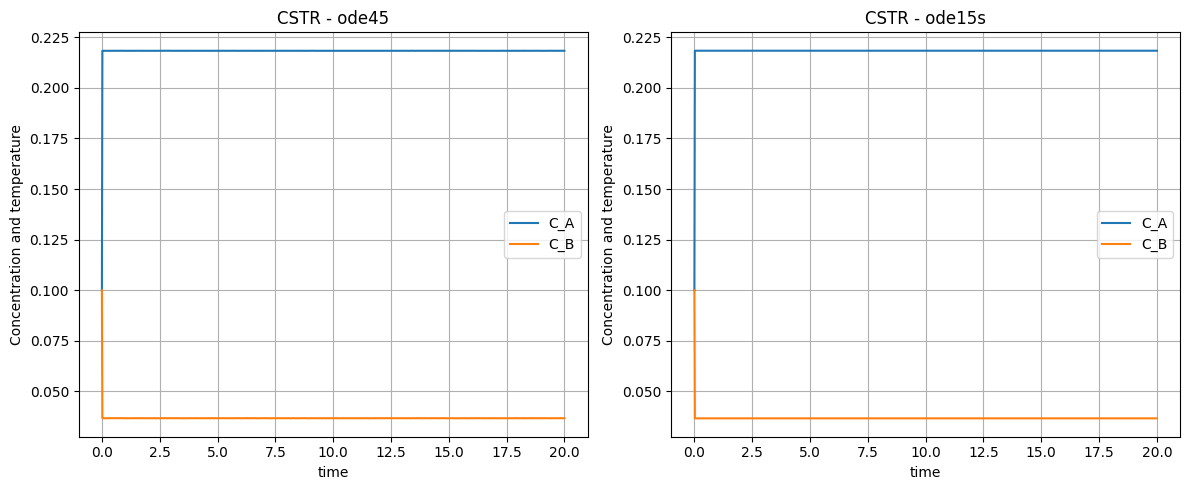

In [10]:
def CSTR(t, C, C0):
    # Given constants 
    deltaHr = -560              # kJ/mol
    rho = 1.0                   # kg/L
    cp = 4.186                  # kJ/(kg*K)
    E_adv_R = 8500              # E_a div med E
    k0 = np.exp(24.6)           # L/(mol*s)
    A = 0.1                     # m^2
    V = 0.105                   # L (according to a Wahlgreen (2020))
    
    CA, CB, T = C


    # Calculating constants
    k = k0 * np.exp(-E_adv_R/T)
    beta = - deltaHr/(rho*cp)
    v = np.array([-1, -2, beta])
    F = 250#v * A
    r=k*CA*CB
    
    # Reaction rate
    R = v.T*r #v transposed

    
    # Calculating the change in concentration
    system = (C0-C) * F/V + R
    dCA, dCB, dT = system

    return [dCA, dCB, dT]

def CSTR_Jac(t, C, C0):
    # Given constants 
    deltaHr = -560              # kJ/mol
    rho = 1.0                   # kg/L
    cp = 4.186                  # kJ/(kg*K)
    E_adv_R = 8500              # E_a div med R
    k0 = np.exp(24.6)           # L/(mol*s)
    A = 0.1                     # m^2
    V = 0.105                   # L (according to a Wahlgreen (2020))
    
    CA, CB, T = C
    # Calculating constants
    k = k0 * np.exp(-E_adv_R/T)
    beta = - deltaHr/(rho*cp)
    v = np.array([-1, -2, beta])

    #F = v * A
    F = 250

    r=k*CA*CB   

    Jac = np.array([
        [-F/V - k*CB,          -k*CA,         ((1/T**(2))*(E_adv_R))*(-r)],
        [-2*k*CB,              -F/V - 2*k*CA, ((1/T**(2))*(E_adv_R))*(-2*r)],
        [beta*k*CB,            beta*k*CA,     ((1/T**(2))*(E_adv_R))*(beta*r)+(F/V)]
    ])

    return Jac





Cin = np.array([1.6/2, 2.4/2, 600])  # inlet concentration
C0 = np.array([0.1, 0.1, 600])       # initial reactor state


t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)  

sol_ode45 = solve_ivp(CSTR, t_span, C0, args=(Cin,), t_eval=t_eval, method='RK45')
sol_ode15s = solve_ivp(CSTR, t_span, C0, args=(Cin,), t_eval=t_eval, method='BDF', jac=CSTR_Jac)

print(CSTR_Jac(1,C0,C))






fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot RK45 (ode45)
axs[0].plot(t_eval, sol_ode45.y[0], label='C_A')
axs[0].plot(t_eval, sol_ode45.y[1], label='C_B')
#axs[0].plot(t_eval, sol_ode45.y[2], label='T')
axs[0].set_xlabel('time')
axs[0].set_ylabel('Concentration and temperature')
axs[0].set_title('CSTR - ode45')
axs[0].legend()
axs[0].grid()


# Plot BDF (ode15s)
axs[1].plot(t_eval, sol_ode15s.y[0], label='C_A')
axs[1].plot(t_eval, sol_ode15s.y[1], label='C_B')
#axs[1].plot(t_eval, sol_ode15s.y[2], label='T')
axs[1].set_xlabel('time')
axs[1].set_ylabel('Concentration and temperature')
axs[1].set_title('CSTR - ode15s')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

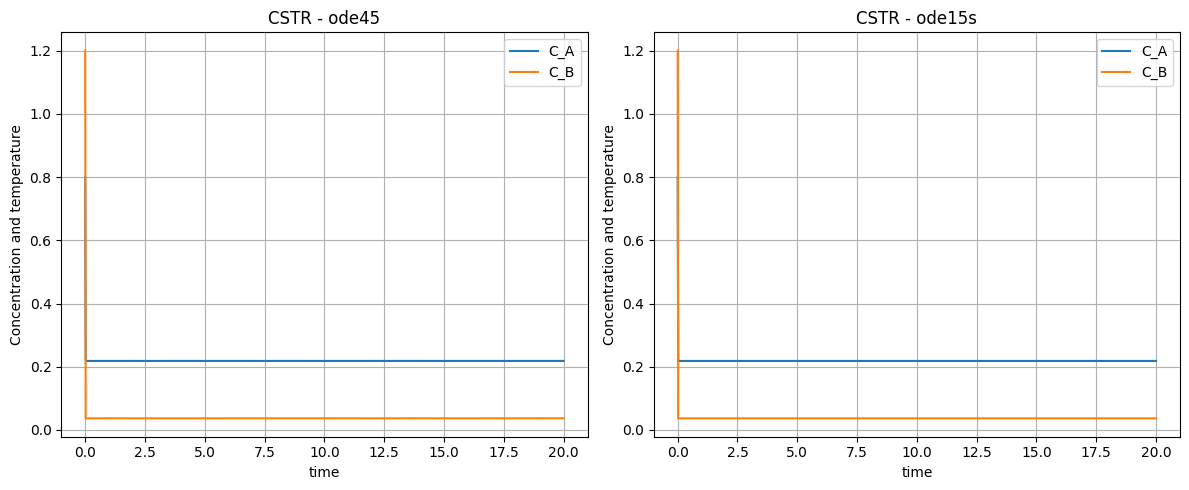

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot RK45 (ode45)
axs[0].plot(t_eval, sol_ode45.y[0], label='C_A')
axs[0].plot(t_eval, sol_ode45.y[1], label='C_B')
#axs[0].plot(t_eval, sol_ode45.y[2], label='T')
axs[0].set_xlabel('time')
axs[0].set_ylabel('Concentration and temperature')
axs[0].set_title('CSTR - ode45')
axs[0].legend()
axs[0].grid()


# Plot BDF (ode15s)
axs[1].plot(t_eval, sol_ode15s.y[0], label='C_A')
axs[1].plot(t_eval, sol_ode15s.y[1], label='C_B')
#axs[1].plot(t_eval, sol_ode15s.y[2], label='T')
axs[1].set_xlabel('time')
axs[1].set_ylabel('Concentration and temperature')
axs[1].set_title('CSTR - ode15s')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

In [12]:
import numpy as np

def CSTR(t, C, Cin):
    # Constants
    deltaHr = -560               # kJ/mol
    rho = 1.0                    # kg/L
    cp = 4.186                   # kJ/(kg*K)
    Ea_over_R = 8500             # K
    k0 = np.exp(24.6)            # L/(mol*s)
    V = 0.105                    # L (from Wahlgreen 2020)
    F = 0.1                      # L/s  (assumed constant flowrate, realistic)

    # State variables
    CA, CB, T = C

    # Arrhenius law
    k = k0 * np.exp(-Ea_over_R/T)

    # Reaction model
    r = k * CA * CB
    beta = -deltaHr / (rho * cp)
    v = np.array([-1, -2, beta])  # stoichiometric vector

    # Reaction term
    R = v * r

    # CSTR dynamics
    dCdt = (Cin - C) * F / V + R

    return dCdt.tolist()

def CSTR_Jac(t, C, Cin):
    # Constants
    deltaHr = -560               # kJ/mol
    rho = 1.0                    # kg/L
    cp = 4.186                   # kJ/(kg*K)
    Ea_over_R = 8500             # K
    k0 = np.exp(24.6)            # L/(mol*s)
    V = 0.105                    # L
    F = 0.1                      # L/s

    # State variables
    CA, CB, T = C

    # Arrhenius law
    k = k0 * np.exp(-Ea_over_R/T)
    r = k * CA * CB
    beta = -deltaHr / (rho * cp)

    # Stoichiometry
    v = np.array([-1, -2, beta])

    # Partial derivatives
    dk_dT = (Ea_over_R / T**2) * k

    # Build the Jacobian matrix
    Jac = np.array([
        [-F/V - k*CB,      -k*CA,       -(dk_dT * CA * CB)],
        [-F/V - 2*k*CB,    -F/V - 2*k*CA, -(2 * dk_dT * CA * CB)],
        [beta*k*CB,        beta*k*CA,    beta*(-dk_dT*CA*CB) + (-F/V)]
    ])

    return Jac


In [11]:
C0 = np.array([1.6/2, 2.4/2, 600])  # Initial condition
Cin = np.array([1.6/2, 2.4/2,600]) # Assume inlet concentration = initial for now

t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol_ode45 = solve_ivp(CSTR, t_span, C0, args=(Cin,), t_eval=t_eval, method='RK45')
sol_ode15s = solve_ivp(CSTR, t_span, C0, args=(Cin,), t_eval=t_eval, method='BDF', jac=CSTR_Jac)


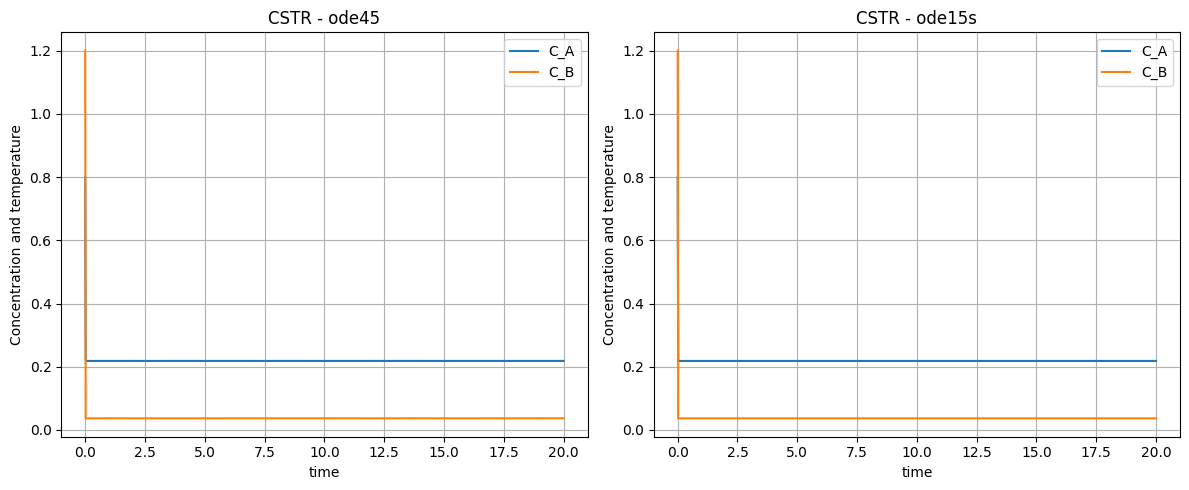

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot RK45 (ode45)
axs[0].plot(t_eval, sol_ode45.y[0], label='C_A')
axs[0].plot(t_eval, sol_ode45.y[1], label='C_B')
#axs[0].plot(t_eval, sol_ode45.y[2], label='T')
axs[0].set_xlabel('time')
axs[0].set_ylabel('Concentration and temperature')
axs[0].set_title('CSTR - ode45')
axs[0].legend()
axs[0].grid()


# Plot BDF (ode15s)
axs[1].plot(t_eval, sol_ode15s.y[0], label='C_A')
axs[1].plot(t_eval, sol_ode15s.y[1], label='C_B')
#axs[1].plot(t_eval, sol_ode15s.y[2], label='T')
axs[1].set_xlabel('time')
axs[1].set_ylabel('Concentration and temperature')
axs[1].set_title('CSTR - ode15s')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

CSTR 1-state

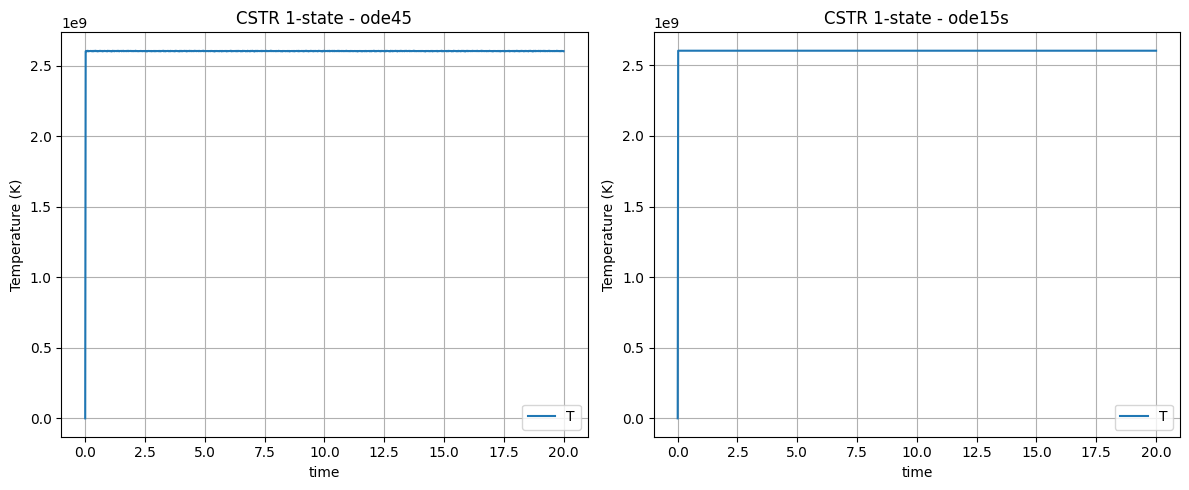

In [16]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def CSTR_1state(t, T, Tin):

    T = T[0]
    # Constants from Wahlgreen et al. (2020)
    deltaHr = -560               # kJ/mol
    rho = 1.0                    # kg/L
    cp = 4.186                   # kJ/(kg*K)
    Ea_over_R = 8500             # K
    k0 = np.exp(24.6)            # L/(mol*s)
    V = 0.105                    # L
    F = 250                      # L/s

    CA_in = 1.6/2                # mol/L
    CB_in = 2.4/2                # mol/L

    beta = -deltaHr / (rho * cp)


    CA = CA_in+1/beta * (T0-T)
    CB = CB_in+2/beta * (T0-T)

    k = k0 * np.exp(-Ea_over_R/T)

    r = k * CA * CB


    dTdt = (Tin - T) * F/V + beta * r

    return [dTdt]



def CSTR_1state_Jac(t, T, Tin):

    T = T[0]
    stants
    
    deltaHr = -560               
    rho = 1.0                   
    cp = 4.186                  
    Ea_over_R = 8500            
    k0 = np.exp(24.6)           
    V = 0.105                   
    F = 250                     
    # Fixed concentrations

    CA_in = 1.6/2
    CB_in = 2.4/2
    beta = -deltaHr / (rho * cp)

    CA = CA_in+1/beta * (T0-T)
    CB = CB_in+2/beta * (T0-T)

    k = k0 * np.exp(-Ea_over_R/T)
    r = k * CA * CB

    dk_dT = (Ea_over_R / T**2) * k

    dr_dT = dk_dT * CA * CB

    Jac = np.array([
        [-F/V + beta * dr_dT]
    ])

    return Jac

# -------------------------------------------------------------------

# Set initial and inlet conditions
T0 = 600       # initial reactor temperature
Tin = 600      # inlet feed temperature

t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the ODE
sol_ode45 = solve_ivp(CSTR_1state, t_span, [T0], args=(Tin,), t_eval=t_eval, method='RK45')
sol_ode15s = solve_ivp(CSTR_1state, t_span, [T0], args=(Tin,), t_eval=t_eval, method='BDF', jac=CSTR_1state_Jac)

# -------------------------------------------------------------------

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot ode45
axs[0].plot(t_eval, sol_ode45.y[0], label='T')
axs[0].set_xlabel('time')
axs[0].set_ylabel('Temperature (K)')
axs[0].set_title('CSTR 1-state - ode45')
axs[0].legend()
axs[0].grid()

# Plot ode15s
axs[1].plot(t_eval, sol_ode15s.y[0], label='T')
axs[1].set_xlabel('time')
axs[1].set_ylabel('Temperature (K)')
axs[1].set_title('CSTR 1-state - ode15s')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


